In [ ]:
!pip install matplotlib

In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

## Схема телепортации кубита

In [14]:
def build_circuit(initial_state):
    qreg = QuantumRegister(3, 'q')  
    creg = ClassicalRegister(1, 'c')  
    circuit = QuantumCircuit(qreg, creg)
    circuit.initialize(initial_state, qreg[0])

    circuit.h(qreg[1])         
    circuit.cx(qreg[1], qreg[2])  
    circuit.cx(qreg[0], qreg[1])  
    circuit.cx(qreg[1], qreg[2])  
    circuit.h(qreg[0])        
    circuit.z(qreg[2])        
    circuit.measure(qreg[2], creg[0])
    return circuit


## Пример работы
Входные данные -- $ver_0, ver_1$ 

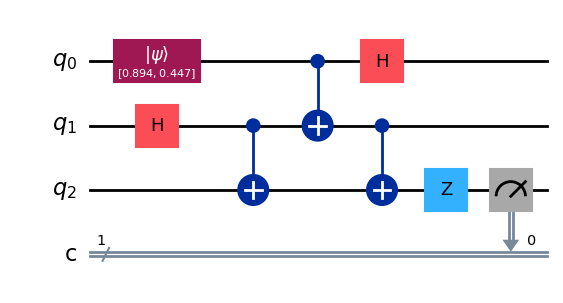

In [30]:
import math

ver0 = 0.8  # Вероятность состояния |0>
ver1 = 0.2  # Вероятность состояния |1>

a = math.sqrt(ver0)
b = math.sqrt(ver1)

circuit = build_circuit([a, b]) 
circuit.draw('mpl')

## Теперь произведем симуляцию

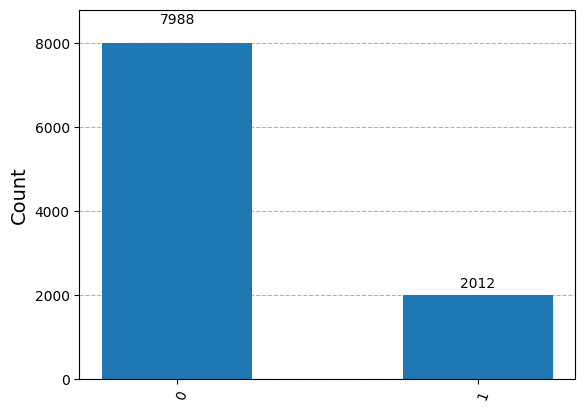

In [34]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(circuit,shots=10000).result()
plot_histogram(result.get_counts())

Мы видим, что кубит, переданный Алисой, имеет то же состояние, что и полученный Бобом. А, значит, алгоритм реализован верно.